In [1]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from statsmodels.tsa.api import seasonal_decompose
from pandas.plotting import autocorrelation_plot
plt.style.use('seaborn-whitegrid')

In [2]:
df=pd.read_csv('http://taanila.fi/beer.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.columns=['Production']
df.head()

,Production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [3]:
#Sovitetaan ennustemalli dataan
fit1 = SimpleExpSmoothing(df['Production']).fit()

C:\Users\Oem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


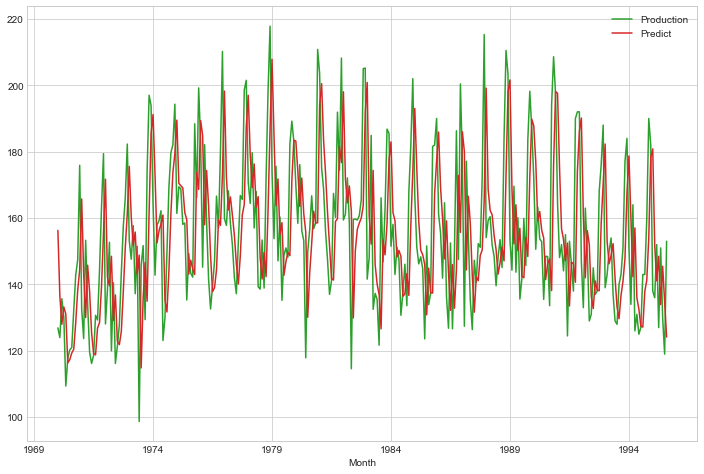

In [4]:
#Simuloidaan tuotannon ennusteita fit1-olion avulla
df['Predict'] = fit1.fittedvalues
df['1970-01':].plot(figsize=(12,8), color=['C2', 'C3'])

In [5]:
#Tutkitaan mallin hyvyyttä virheiden neliösumman neliöjuurena
sqrt(mean_squared_error(df['Production'], df['Predict']))

18.888362006990754

In [6]:
#Tutkitaan mallin hyvyyttä virheiden itseisarvojen keskiarvona
mean_absolute_error(df['Production'], df['Predict'])

14.934240661422463

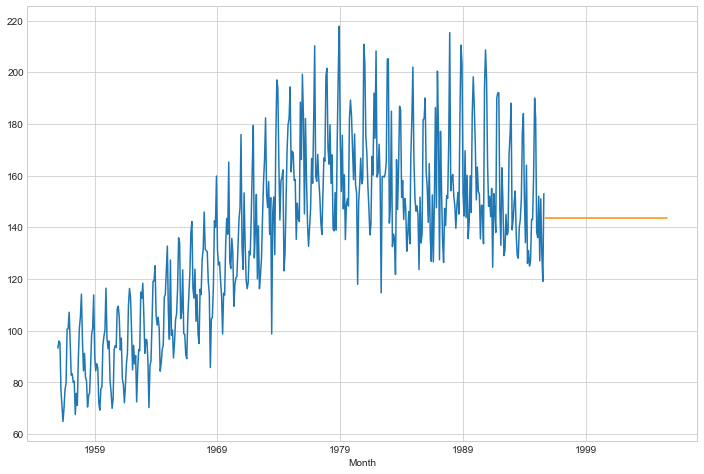

In [7]:
#Ennustetaan oluen tuotantoa 10 vuodelle
ses1 = fit1.forecast(120)

df['Production'].plot(figsize=(12,8))
ses1.plot(color='darkorange')

In [8]:
#Uusi dataframe uutta mallia varten
df2 = pd.read_csv('http://taanila.fi/beer.csv')
df2.index = pd.to_datetime(df2['Month'],format='%Y-%m')
df2 = df2.drop('Month',axis=1)
df2.columns = ['Production']

In [9]:
#Sovitetaan ennustemalli dataan
fit2 = Holt(df2['Production']).fit()

C:\Users\Oem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


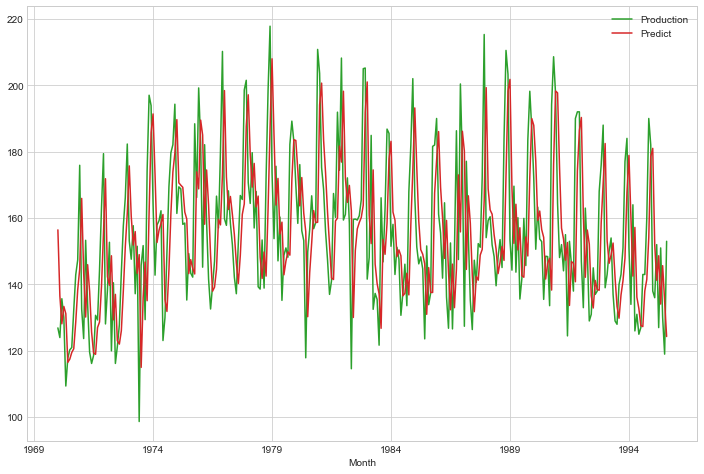

In [10]:
#Simuloidaan tuotannon ennusteita fit2-olion avulla
df2['Predict'] = fit2.fittedvalues
df2['1970-01':].plot(figsize=(12,8), color=['C2', 'C3'])

In [11]:
#Tutkitaan mallin hyvyyttä virheiden neliösumman neliöjuurena
sqrt(mean_squared_error(df2['Production'], df2['Predict']))

18.887712861883152

In [12]:
#Tutkitaan mallin hyvyyttä virheiden itseisarvojen keskiarvona
mean_absolute_error(df2['Production'], df2['Predict'])

14.93299227075931

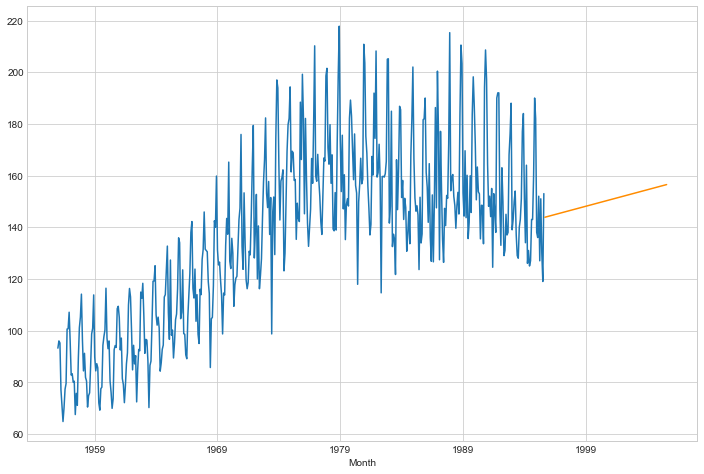

In [13]:
#Ennustetaan oluen tuotantoa 10 vuodelle
ses2 = fit2.forecast(120)

df2['Production'].plot(figsize=(12,8))
ses2.plot(color='darkorange')

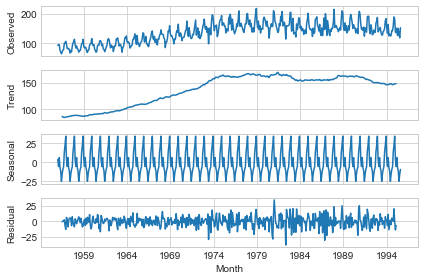

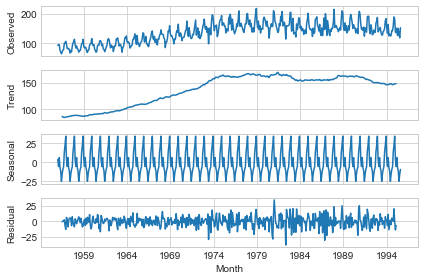

In [14]:
#Tarkastellaan aikasarjan trendi- ja kausivaihtelua seasonal_decompose()-työkalun avulla
seasonal_decompose(df2['Production']).plot()

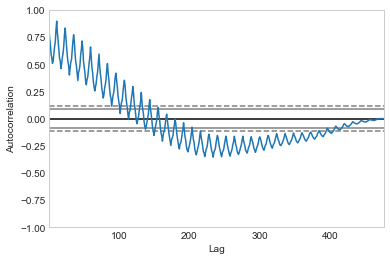

In [15]:
#Tutkitaan aikasarjan ja viivästetyn aikasarjan välisä korrelaatiota
autocorrelation_plot(df2['Production'])

In [16]:
#Uusi dataframe uutta mallia varten
df3 = pd.read_csv('http://taanila.fi/beer.csv')
df3.index = pd.to_datetime(df3['Month'],format='%Y-%m')
df3 = df3.drop('Month',axis=1)
df3.columns = ['Production']

In [17]:
#Sovitetaan ennustemalli dataan. 120 periodia antaa erinomaisen tuloksen
fit3 = ExponentialSmoothing(df3['Production'], seasonal_periods=120 , 
                            trend='add', seasonal='mul').fit()

C:\Users\Oem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


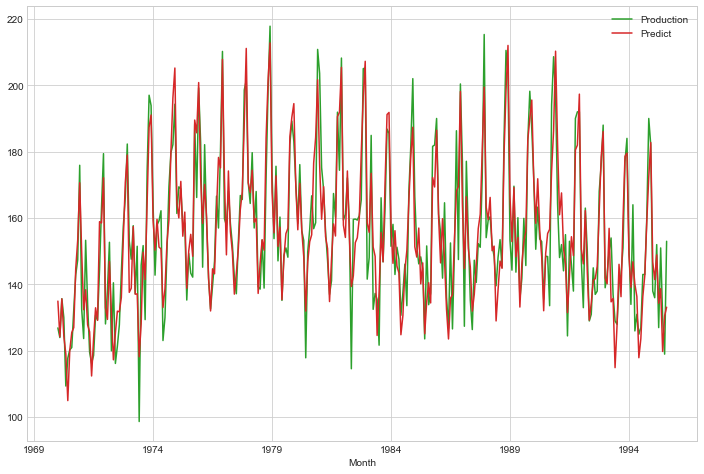

In [18]:
#Simuloidaan tuotannon ennusteita fit2-olion avulla
df3['Predict'] = fit3.fittedvalues
df3['1970-01':].plot(figsize=(12,8), color=['C2', 'C3'])

In [19]:
#Tutkitaan mallin hyvyyttä virheiden neliösumman neliöjuurena
sqrt(mean_squared_error(df3['Production'], df3['Predict']))

8.553482639014844

In [20]:
#Tutkitaan mallin hyvyyttä virheiden itseisarvojen keskiarvona
mean_absolute_error(df3['Production'], df3['Predict'])

6.771823181367961

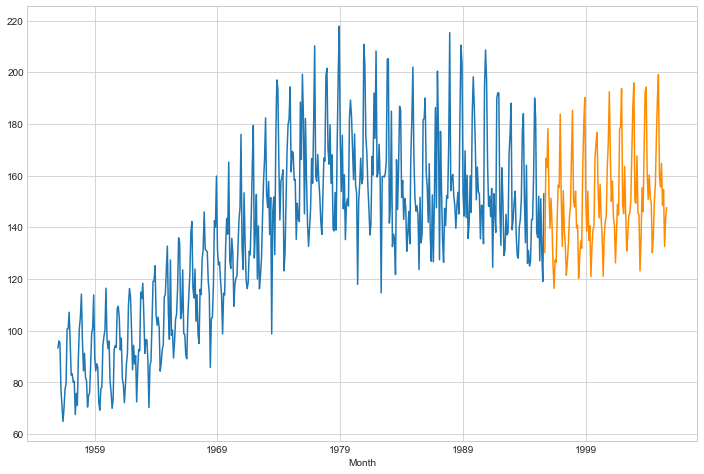

In [21]:
#Ennustetaan oluen tuotantoa 10 vuodelle
ses3 = fit3.forecast(120)

df3['Production'].plot(figsize=(12,8))
ses3.plot(color='darkorange')